<a href="https://colab.research.google.com/github/LF7-AI/Coding-for-Computational-Biologist/blob/main/Demo_Learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

SEQUENCES_URL = 'https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/sequences.txt'
response= requests.get(SEQUENCES_URL)
sequence= response.text
print(sequence[:100])

CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC
GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGCGTC


In [ ]:
sequences = requests.get(SEQUENCES_URL).text.split('\n')
sequences = list(filter(None, sequences))  # This removes empty sequences.
#sequences = sequences[1:]    #this helps to remove the header line i.e., '> NCBI00' #only use if use are using the ncbi seq viewer direct;y which wont work for this.

# Let's print the first few sequences.
pd.DataFrame(sequences, index=np.arange(1, len(sequences)+1),
             columns=['Sequences']).head()

,Sequences
1,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
2,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
3,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
4,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
5,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...


Next here for deep learning algorithm we organise data , So we use one-hot encoding which encodes every base in a sequence in to form of 4-Dimensional vector.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()
# The OneHotEncoder converts an array of integers to a sparse matrix where
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')

# Fit the encoders on all possible characters including 'N' for padding
all_characters = ['A', 'C', 'G', 'T', 'N']
integer_encoder.fit(all_characters)
# Fit the one-hot encoder on the integer-encoded representation of all possible characters
integer_encoded_all = integer_encoder.transform(all_characters).reshape(-1, 1)
one_hot_encoder.fit(integer_encoded_all)


input_features = []
max_sequence_length = max(len(sequence) for sequence in sequences)

for sequence in sequences:
  # Pad the sequence to the maximum length
  padded_sequence = sequence.ljust(max_sequence_length, 'N')
  integer_encoded = integer_encoder.transform(list(padded_sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.transform(integer_encoded) # Use transform here
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CCGAGGGCTA ... CGCGGACACC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Similarly, we can now go ahead and load labels (response variables).  In this case, the labels are structured as follow: '1'- if the protein bound seq  or '0'- indicates that protein binding seq absent.


In [ ]:
LABELS_URL = 'https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/labels.txt'

labels = requests.get(LABELS_URL).text.split('\n')
labels = list(filter(None, labels))  # removes empty sequences

one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [['0' '0' '0' ... '0' '1' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [ ]:
#Mention the sequences and labels
X=input_features
y=input_labels
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2000, 50, 5)
y shape: (2000, 2)


In [ ]:
#Checking the input_features (X) & input_labels (y)
print(X.shape[0])
print(y.shape[0])

2000
2000


In [ ]:
#CODE IS GETTING FIXED!!!!!!!!!!!!!!!!##########################
#Since the features & labels are not matching as the spliting cant handle such mismatch data, so we have only 2 options.
#1. try to align features= 469 to labels= 2000 (the one which gets aligned to our features)
#2. next is indices or IDs each seq and labels which is too cumbersome.

#print(X.shape[0])
#print(y.shape[0])


In [ ]:
#############CODE IS GETTING FIXED!!!!!!!!!###############
#STEP-1: GROUPING THE LABELS & EXTRACTING THE AVG LABELS UPTO 469---------------
#import numpy as np

#num_features = X.shape[0]      # 469
#num_labels = y.shape[0]        # 2000

# Step 1: Divide labels into roughly equal groups
#labels_per_feature = num_labels // num_features   # about 4 labels per feature

# Step 2: For each feature, take average (or majority) of its label group
#new_y = []
#for i in range(num_features):
    #start = i * labels_per_feature
    #end = start + labels_per_feature
    # Average if one-hot labels (numeric)
    #group_avg = np.mean(y[start:end], axis=0)
    #new_y.append(group_avg)

#new_y = np.array(new_y)
#print("Old y shape:", y.shape)
#print("New y shape:", new_y.shape)


In [ ]:
##########CODE IS GETTING FIXED!!!!!!!!!!!############################
##This alignment issue is only occurs in DNA, RNA , sequences, Transcript Binding sites.
#Not forr diseases prediction model building.

Spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(input_features, input_labels,
                                                                            test_size=0.25, random_state=42)

2. Select the Architecture & Train

Next, we choose a neural network architecture to train the model. In this tutorial, we choose a simple 1D convolutional neural network (CNN), which is commonly used in deep learning for functional genomics applications.

In [ ]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout # Import Dropout layer
from tensorflow.keras.models import Sequential

model= Sequential()
model.add(Conv1D(filters=32, kernel_size=12,activation='relu',
                 input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.3))  # Dropout after pooling
model.add(Flatten())
model.add(Dense(16, activation= 'relu'))
model.add(Dropout(0.3))  # Dropout after dense layer
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', # Explicitly name the loss argument
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 39, 32)         │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,610 (25.82 KB)

 Trainable params: 6,610 (25.82 KB)

 Non-trainable params: 0 (0.00 B)

Codes Explained:

input_shape=(train_features.shape[1], train_features.shape[2]):
train_features.shape[1] → number of time steps (sequence length)

train_features.shape[2] → number of channels/features per position, e.g., 5

binary_crossentropy is a loss function used for binary classification problems, where your model predicts one of two possible classes — e.g.:
1.Spam / Not spam
2.Positive / Negative

train_features.shape[1], 2)))

[1] = 200 → sequence length (how many time steps per sample)
2 = features per step

In [ ]:
#Now, we will go and train neural network. We will split the sets to - training, testing, validation.
#We will plot the loss curve on both the training and val set, to check improvement or getting worse in each cycle.

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=50, verbose=0, validation_split=0.25)

**Please run the cell with ID `S1epYSHnDRgQ` to define the `model` before running this cell.**

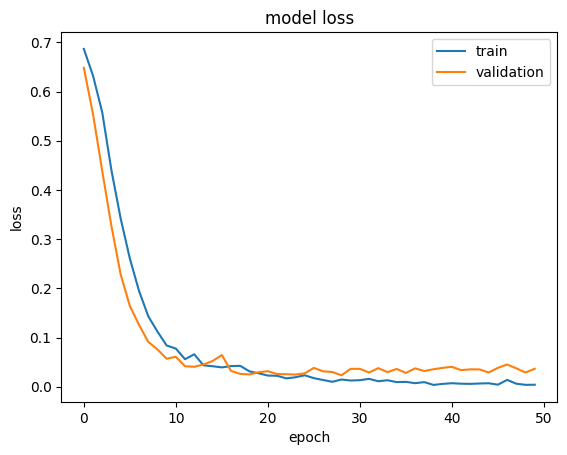

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

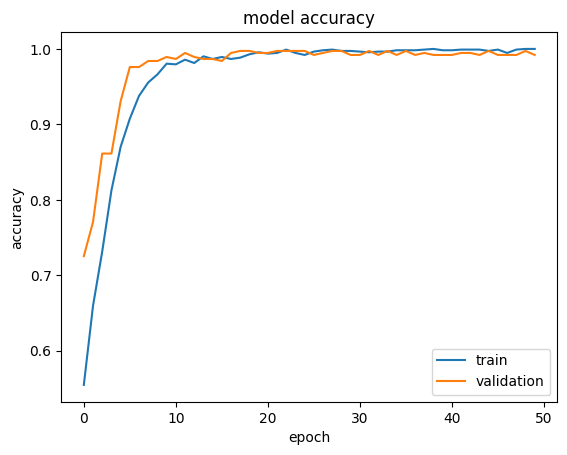

In [ ]:
#Model Accuracy:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

3. EVALUTE- Udsing Confusion Matrix

![alt text](https://github.com/abidlabs/deep-learning-genomics-primer/blob/master/Screenshot%20from%202018-08-01%2020-32-12.png?raw=true)

The best way to evaluate whether the network has learned to classify sequences is to evaluate its performance on a fresh test set consisting of data that it has not observed at all during training. Here, we evaluate the model on the test set and plot the results as a confusion matrix. Nearly every test sequence should be correctly classified.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion matrix:
 [[259   0]
 [  0 241]]


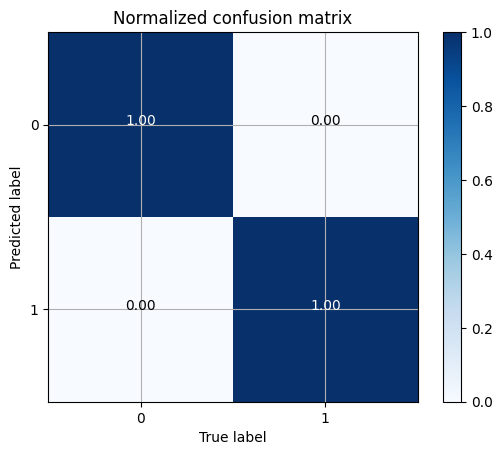

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1),
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

1. np.stack(test_features) combines all these arrays into a single 3D array, shape.
np.stack turns a list of arrays into a single array with an added dimension so your model can process multiple sequences at once.

2. np.argmax(test_labels, axis=1):
Converts one-hot vectors to integer class labels.

3. confusion_matrix(true, predicted):
Computes the confusion matrix between true labels and predicted labels.

4. cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
float- to be in floating-points
axis- return to 1D
sum(axis=1) → sum across columns (for each row)
[:, np.newaxis] reshapes the 1D array into a column vector so it can be broadcasted with cm.
"Division" because-Divides each element in a row by the sum of that row
Effect: each row now sums to 1 → represents proportions instead of raw counts

This is normalzation of the Confusion Matrix, this is done as it is useful for visualization of Confusion Matrix.

4. Interpret
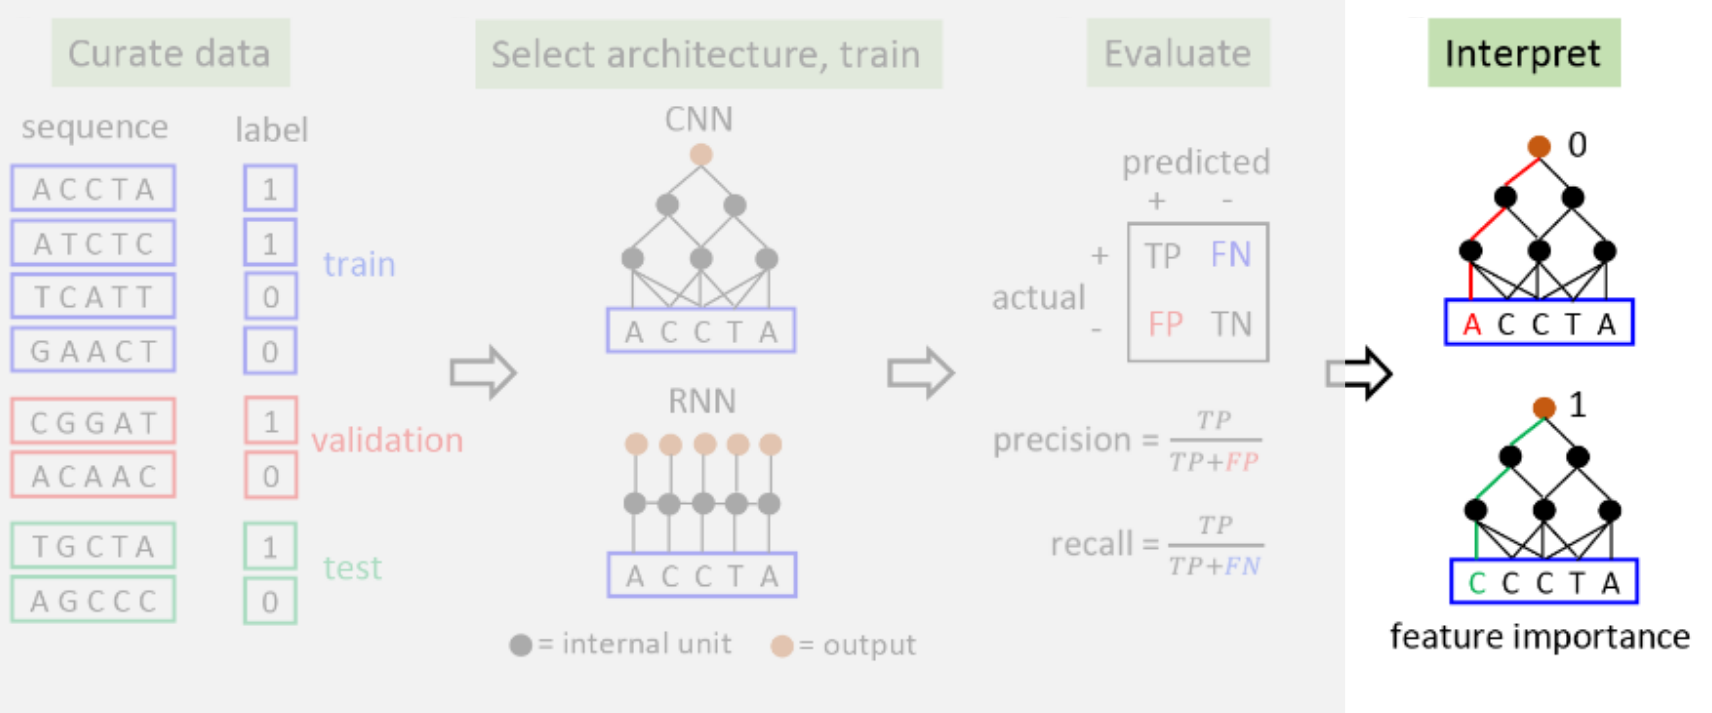

Creating a saliency map! (This mao is not perfect as the results are not ideal and produced flat monochrome saliency map. Could be because of vanishing gradient or not inference mode set to false which let the dropout to introduce randomnes ).

Another reason I think this saliency map is not ideal for DNA sequence .

In [ ]:
#STEP-2: CLUSTERING USING K-MEANS
#import numpy as np
#from sklearn.cluster import KMeans

# Your current labels (2000, 2)
#num_target_labels = 469  # same as number of feature samples

# Cluster 2000 labels into 469 groups
#kmeans = KMeans(n_clusters=num_target_labels, random_state=42)
#cluster_ids = kmeans.fit_predict(y)  # each of 2000 labels assigned to 1 of 469 clusters

# Now, aggregate labels within each cluster
#new_y2 = []
#for i in range(num_target_labels):
    #indices = np.where(cluster_ids == i)[0]
    # take mean of labels within each cluster (since they are numeric)
    #cluster_mean = np.mean(y[indices], axis=0)
    #new_y2.append(cluster_mean)

#new_y2 = np.array(new_y2)
#print("Old y shape:", y.shape)
#print("New y shape:", new_y2.shape)


In [ ]:
#Sanity check
#print(np.unique(cluster_ids).shape)

Here we ran K-means and we got 2 as answer as ther is only 2 classifiable outcome i.e. bineary inputs like (0,1). Thus the one-hot-encoding doesn't work with K-means in this sinario.

SO basically, I found mistake that I used the features as human tp 53 gene seq of 100 sequence. The problem here is that the example i am looking by is using some other gene as sequence which is completely differnt from my feature. The promoter is specifically build for that feature and thats why it keeps failing in my model. I will now need to change my features and then see this.

In [ ]:
SALIANCY MAP

In [ ]:
###################### THIS WE NEED FIX FOR SALIANCY MAP########################
#1. SMOOTHGRAD
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras import backend as K

#def smoothgrad(model, x, class_index=None, num_samples=20, noise_level=0.1):
    x = np.expand_dims(x, axis=0).astype(np.float32)
    grads_list = []

    for _ in range(num_samples):
        noise = noise_level * np.random.normal(size=x.shape)
        noisy_x = x + noise
        with tf.GradientTape() as tape:
            tape.watch(noisy_x)
            preds = model(noisy_x)
            if class_index is None:
                class_index = tf.argmax(preds[0])
            loss = preds[:, class_index]
        grads = tape.gradient(loss, noisy_x)
        grads_list.append(grads.numpy())

    grads = np.mean(np.array(grads_list), axis=0)[0]
    saliency = np.abs(grads).mean(axis=-1)  # Aggregate across channels
    return saliency

We are using smooth-gradient in Saliancy map. Here we create noisy x and y, to monitor the features. However, the concepts are little tricky and you need to 1st learn it and then process///

This code is computing and visualizing a saliency map (using SmoothGrad) for one sequence input to a model

In [ ]:
sequence_index = 1999
x = input_features[sequence_index]

sal = smoothgrad(model, x, num_samples=20, noise_level=0.1)
sal = np.mean(np.abs(sal), axis=-1)  # reduce across channels if needed

plt.figure(figsize=[16,5])
barlist = plt.bar(np.arange(len(sal)), sal)
[barlist[i].set_color('C1') for i in range(5,17)]  # adjust indices if needed
plt.xlabel('Bases')
plt.ylabel('Magnitude of saliency values')
plt.xticks(np.arange(len(sal)), list(sequences[sequence_index]));
plt.title('Saliency map for bases in one of the positive sequences '
          '(orange indicates actual motif region)');
